# Test di Pearson #

test non parametrico, utilizzato per determinare quale sia il miglior metodo di approssimazione dei parametri di una distribuione 

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
from scipy.stats import norm   #importo la distribuzione normale
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title  


In [2]:
%matplotlib inline 

In [3]:
abs_m=pd.read_pickle("abs_m")           #leggo i dati dei valori dei parametri a e b calcolati precedentemente
abs_mq=pd.read_pickle("abs_mq")
abs_mle=pd.read_pickle("abs_mle")
data=pd.read_pickle("massimi_bieno")
data

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
anno,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971.0,10.2,11.8,14.6,19.8,41.4,70.0,88.0,121.0
1972.0,13.2,15.8,16.6,26.6,33.4,35.8,45.0,63.8
1973.0,18.8,19.8,21.6,22.0,24.4,38.6,49.0,71.8
1974.0,10.4,14.6,17.6,NaN,NaN,NaN,NaN,NaN
1975.0,17.0,23.2,NaN,26.4,29.8,33.4,50.2,90.5
1976.0,NaN,41.6,NaN,45.6,48.6,50.4,75.2,127.2
1977.0,18.0,19.2,26.0,27.0,32.4,45.0,60.4,67.6
1978.0,18.4,18.6,18.8,20.2,25.8,43.4,71.0,107.0


Applichiamo ora il Test di Pearson sui dati importati

In [4]:
def Pearson(data,abs_m,abs_mq,abs_mle,delta):
    pearson=[]
    def X2(data,abs_t,h,delta):
        dt=data[h].dropna()       #leggo i dati per fascia oraria
        lh=len(dt)                 #calcolo la lunghezza della serie temporale
        q=[delta*(i+1) for i in range(int(1/delta))]    #definisco i quantili, ovvero gli estremi sup. degli intervalli
        rv=gumbel_r(loc=abs_t.at["a",h],scale=abs_t.at["b",h]) #calcolo gumbel con i valori prefissati di a e b
        ecdf = ECDF(dt)
        r=ecdf(rv.ppf(q))  #calcolo il numero di elementi presenti all, interno di ciascun intervallo 
        o0=lh*r   #numero di dati osservati in ogni quantile
        o=o0-np.append([0],np.delete(o0,-1))   # siamo interessati alla differenza tra i dati successivi ovvero i valori osservati in ciascun intervallo
        e=[delta*lh for i in range(len(r))]  # calcolo i valori attesi per ogni quantile
        return ((o-e)**2/e).sum() # mi calcolo finalmente x quadro
    for h in data.columns:
        pearson=pearson+[[X2(data,abs_m,h,0.2),X2(data,abs_mq,h,0.2),X2(data,abs_mle,h,0.2)]]
    pearson=pd.DataFrame(pearson,index=["15 min","30 min","45 min","1 ora","3 ore","6 ore","12 ore","24ore"],columns=["M","Mq","MLE"])
    return pearson


In [5]:
Pearson(data,abs_m,abs_mq,abs_mle,0.2)

,M,Mq,MLE
15 min,6.108108,4.486486,5.027027
30 min,1.384615,0.871795,2.153846
45 min,2.054054,1.243243,0.972973
1 ora,2.000000,2.263158,2.263158
3 ore,2.789474,2.263158,1.210526
6 ore,3.315789,3.052632,4.894737
12 ore,2.526316,2.000000,2.526316
24ore,7.526316,3.315789,4.368421


In [6]:
def bestParameters(abs_m,abs_mq,abs_mle):
    best=DataFrame([abs_mq["15 min"],abs_mq["30 min"],abs_mle["45 min"],abs_m["1 ora"],abs_mle["3 ore"],abs_mq["6 ore"],abs_mq["12 ore"],abs_mq["24 ore"]]).T
    best.to_pickle("best_param")
    return best

In [7]:
bestParameters(abs_m,abs_mq,abs_mle)

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
a,11.663214,14.491668,16.811388,19.110965,29.629658,39.539450,53.206385,74.212278
b,4.466666,5.385548,5.027258,6.491387,5.699094,6.408727,11.844914,18.848570


La tabella soprastante riporta i valori migliori dei parametri a e b per poter meglio approssimare la curva di Gumbel ad i dati registrati

In [10]:
def adapt_Gumbel(best):
    def gumbel(x,abs_d,col):
        return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
    t_rain=np.linspace(data.min()[0],data.max()[7],100)  #crea degli intevalli ugualemnte spaziati rispetto i dati immessi
    gb=pd.DataFrame([gumbel(t_rain,best,"1 ora"),    
                 gumbel(t_rain,best,"3 ore"),
                 gumbel(t_rain,best,"6 ore"),
                 gumbel(t_rain,best,"12 ore"),
                 gumbel(t_rain,best,"24 ore")]).T  #creo un dataframe che mi contiene i dati delle curve di gumbel stimate con i migliori parametri
    gb.index=t_rain
    gb.columns=["1 ora","3 ore","6 ore","12 ore","24 ore"] #imposto il nome delle colonne
    plt.rc('xtick', labelsize=20) #Quest  comandi globali
    plt.rc('ytick', labelsize=20) #Questi sono comandi globali
    ax=gb.plot(color=["red","blue","cyan","green","black"])
    
    data1h = data["1 ora"].dropna()  #salvo i dati relativi alla durata in una variabile
    ecdf1h = ECDF(data1h)  #calcolo la curva di distrbuzione empirica per la durata scelta
    ax.plot(data1h,ecdf1h(data1h),'o',c="red")
    
    data3h=data["3 ore"].dropna()
    ecdf3h = ECDF(data3h)
    ax.plot(data3h,ecdf3h(data3h),"o",c="blue")
    
    data6h=data["6 ore"].dropna()
    ecdf6h = ECDF(data6h)
    ax.plot(data6h,ecdf6h(data6h),"o",c="cyan")
    
    data12h=data["12 ore"].dropna()
    ecdf12h = ECDF(data12h)
    ax.plot(data12h,ecdf12h(data12h),"o",c="green")
    
    data24h=data["24 ore"].dropna()
    ecdf24h = ECDF(data24h)
    ax.plot(data24h,ecdf24h(data24h),"o",c="black")
    
    ax.set_title('distribuzione pluviometrica')
    ax.set_xlabel('Rainfall (mm)')
    ax.set_ylabel('P[H<h]')
    
    t_rain=np.linspace(data.min()[0],data.max()[3],100) #crea degli intevalli ugualemnte spaziati rispetto i dati immessi
    gbsub=pd.DataFrame([gumbel(t_rain,best,"15 min"),
                 gumbel(t_rain,best,"30 min"),
                 gumbel(t_rain,best,"45 min")]).T
    gbsub.index=t_rain
    gbsub.columns=["15 min","30 min","45 min"]
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    axh=gbsub.plot(color=['yellow','brown',"red"])
    data15m=data["15 min"].dropna()
    ecdf15m = ECDF(data15m)
    axh.plot(data15m,ecdf15m(data15m),'o',c='yellow')
    
    data30m=data["30 min"].dropna()
    ecdf30m = ECDF(data30m)
    axh.plot(data30m,ecdf30m(data30m),'o',c='brown')
    
    data45m=data["45 min"].dropna()
    ecdf45m = ECDF(data45m)
    axh.plot(data45m,ecdf45m(data45m),'o',c='red')
    
    #data1h = data["1 ora"].dropna()
    #ecdf1h = ECDF(data1h)
    #axh.plot(data1h,ecdf1h(data1h),'o',c="red")
               
    axh.set_title('distribuzione pluviometrica')
    axh.set_xlabel('Rainfall (mm)')
    axh.set_ylabel('P[H<h]')
    
    return ax,axh

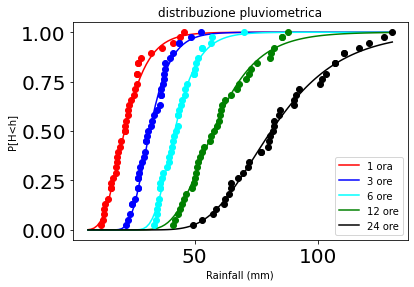

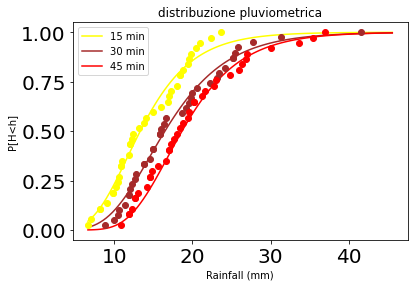

In [11]:
migliori=pd.read_pickle("best_param")
a,b=adapt_Gumbel(migliori)

possiamo notare come i dati siano ben rappresentati dalle curve empiriche, perciò possiamo verificare la bontà dei parametri scelti per rappresentare le curve di Gumbel.